In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df=pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [5]:
df.shape

(200000, 9)

In [6]:
df.size

1800000

In [7]:
df["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"])

In [8]:
df.drop(columns=["Unnamed: 0","key"],inplace=True)

In [9]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [10]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [11]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [12]:
df["dropoff_longitude"].fillna(df["dropoff_longitude"].mean(),inplace=True)

In [13]:
df["dropoff_latitude"].fillna(df["dropoff_latitude"].mean(),inplace=True)

In [14]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [15]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117375,6.794812,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


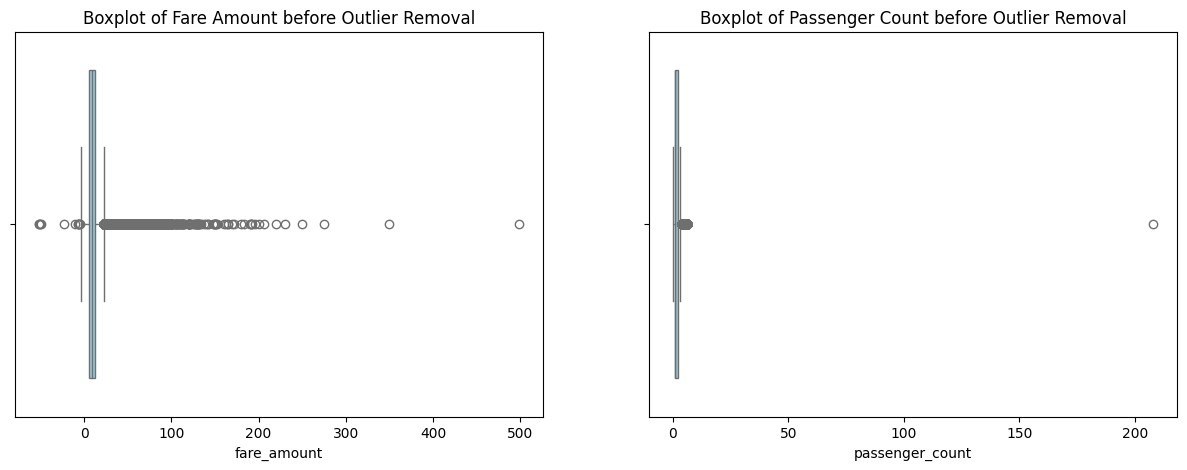

In [16]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

sns.boxplot(x=df["fare_amount"],ax=axes[0],color="skyblue")
axes[0].set_title("Boxplot of Fare Amount before Outlier Removal")

sns.boxplot(x=df["passenger_count"],ax=axes[1],color="skyblue")
axes[1].set_title("Boxplot of Passenger Count before Outlier Removal")

plt.show()

In [20]:
df = df[(df["passenger_count"] >= 1) & (df["passenger_count"] <= 6)]

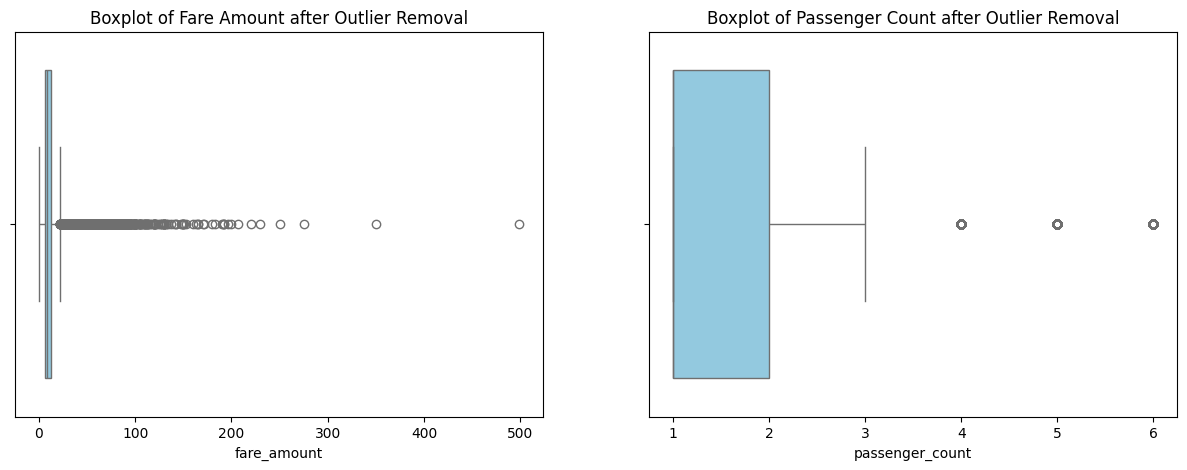

In [21]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

sns.boxplot(x=df["fare_amount"],ax=axes[0],color="skyblue")
axes[0].set_title("Boxplot of Fare Amount after Outlier Removal")

sns.boxplot(x=df["passenger_count"],ax=axes[1],color="skyblue")
axes[1].set_title("Boxplot of Passenger Count after Outlier Removal")

plt.show()

In [19]:
cols=df.select_dtypes(include=["int64","float64"])
correln=cols.corr()
correln

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.010385,-0.008413,0.009000,-0.011031,0.010163
pickup_longitude,0.010385,1.000000,-0.815905,0.833007,-0.846335,-0.000083
pickup_latitude,-0.008413,-0.815905,1.000000,-0.774585,0.701940,-0.001948
dropoff_longitude,0.009000,0.833007,-0.774585,1.000000,-0.916742,0.000240
dropoff_latitude,-0.011031,-0.846335,0.701940,-0.916742,1.000000,-0.000907
passenger_count,0.010163,-0.000083,-0.001948,0.000240,-0.000907,1.000000


In [22]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199273.000000,199273.000000,199273.000000,199273.000000,199273.000000,199273.000000
mean,11.369132,-72.529776,39.936999,-72.527434,39.924963,1.689451
std,9.905917,11.435246,7.724102,13.120896,6.795256,1.305394
min,0.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,1.000000
25%,6.000000,-73.992065,40.734796,-73.991410,40.733827,1.000000
50%,8.500000,-73.981825,40.752585,-73.980095,40.753042,1.000000
75%,12.500000,-73.967160,40.767157,-73.963663,40.767995,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,6.000000


In [25]:
X=df[["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","passenger_count"]]
y=df["fare_amount"]

In [29]:
std=StandardScaler()
X_std=std.fit_transform(X)
y_std=std.fit_transform(y.values.reshape(-1, 1))

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X_std,y_std,test_size=0.2,random_state=42)

In [31]:
Linear=LinearRegression()
Linear.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred=Linear.predict(X_test)

In [38]:
Random=RandomForestRegressor(n_estimators=100,random_state=42)
Random.fit(X_train,y_train.ravel())

RandomForestRegressor(random_state=42)

In [36]:
y_pred_rf=Random.predict(X_test)

In [37]:
r2_ln=r2_score(y_test,y_pred)
rsme_ln=np.sqrt(mean_squared_error(y_test,y_pred))
print("R2 Score for Linear Regression is : ",r2_ln)
print("RSME for Linear Regression is : ",rsme_ln)

R2 Score for Linear Regression is :  0.00025049571953994487
RSME for Linear Regression is :  0.9818573151540798


In [39]:
r2_rf=r2_score(y_test,y_pred)
rsme_rf=np.sqrt(mean_squared_error(y_test,y_pred))
print("R2 Score for Random Forest Regression is : ",r2_rf)
print("RSME for Random Forest Regression is : ",rsme_rf)

R2 Score for Random Forest Regression is :  0.00025049571953994487
RSME for Random Forest Regression is :  0.9818573151540798
